# Housing price analysis and feature importance

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

We now want to create a feature matrix $X$ and a corresponding housing price vector $y$.

In [2]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

The meaning of these features is as follows:

* MedInc: median income in a certain block
* HouseAge: median house age in a certain block
* AveRooms: average number of rooms in a certain block
* AveBedrms: average number of bedrooms in a certain block
* Population: block population
* AveOccup: average house occupancy in a certain block
* Latitude: house block latitude
* Longitude: house block longitude
* MedHouseVal: median house value in 100k$

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Regression analysis

We now train a random forest regressor to make house price predictions.

In [9]:
forest = RandomForestRegressor()

In [10]:
forest.fit(X_train, y_train)

RandomForestRegressor()

Calling "forest.score" returns the coefficient of determination of prediction (i.e., $R^2$).

In [11]:
print("model score on training data:",forest.score(X_train,y_train))

model score on training data: 0.9728067767870857


In [12]:
print("model score on training data:",forest.score(X_test,y_test))

model score on training data: 0.8117877678988604


There are different ways to output a housing price prediction.

In [13]:
forest.predict(X_test.iloc[0].to_numpy().reshape(1,-1))

array([2.11634])

In [14]:
forest.predict(X_test)[0]

2.1163399999999997

Let's visualize some of these results.

In [26]:
from matplotlib.ticker import MultipleLocator

In [24]:
sns.set_context("talk")

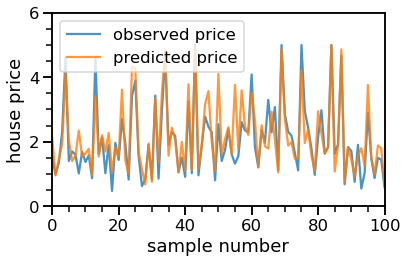

In [31]:
fig, ax = plt.subplots()
plt.plot(y_test.to_numpy(),alpha=0.8,label=r"observed price")
plt.plot(forest.predict(X_test),alpha=0.8,label=r"predicted price")
plt.xlabel(r"sample number")
plt.ylabel(r"house price")
plt.xlim(0,100)
plt.ylim(0,6)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
plt.legend(loc=2)
plt.tight_layout()
plt.show()

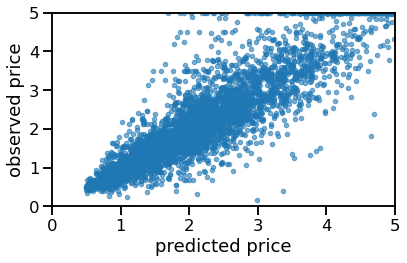

In [33]:
fig, ax = plt.subplots()
plt.plot(forest.predict(X_test),y_test.to_numpy(),'.',alpha=0.6)
plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")
plt.xlim(0,5)
plt.ylim(0,5)
plt.tight_layout()
plt.show()

Can we identify the most important features in such a Random Forest regression?

In [34]:
feature_names = [x for x in X.columns]

In [35]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [36]:
importances = forest.feature_importances_

In [38]:
sorted_lists = sorted(zip(importances,feature_names), reverse=True)

In [39]:
importances, feature_names = [x[0] for x in sorted_lists], [x[1] for x in sorted_lists]

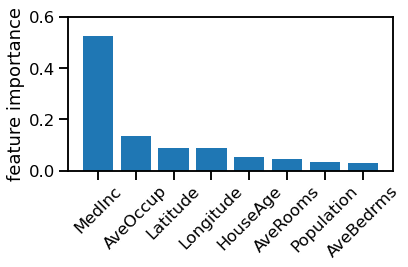

In [40]:
plt.figure()
plt.bar(feature_names,importances)
plt.xticks(rotation=45)
plt.ylabel(r"feature importance")
plt.ylim(0,0.6)
plt.tight_layout()
plt.show()

## Ordinary least squares

In [41]:
OLS_model = OLS(y_train,X_train).fit()

In [44]:
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.607e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:14:50   Log-Likelihood:                         -18082.
No. Observations:               15480   AIC:                                  3.618e+04
Df Residuals:                   15472   BIC:                                  3.624e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5170      0.005    104.348      0.000       0.507       0.527
HouseAge       0.0156      0.001     28.978      0.000       0.015       0.017
AveRooms      -0.1866      0.007    -26.056      0.000      -0.201      -0.173
AveBedrms      0.8686      0.034     25.391      0.000       0.802       0.936
Population  7.979e-06   5.91e-06      1.351      0.177    -3.6e-06    1.96e-05
AveOccup      -0.0044      0.001     -7.680      0.000      -0.006      -0.003
Latitude      -0.0641      0.004    -15.461      0.000      -0.072      -0.056
Longitude     -0.0165      0.001    -12.518      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     3404.644   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12391.469
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       6.820   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
OLS_predictions = OLS_model.predict(X_test)

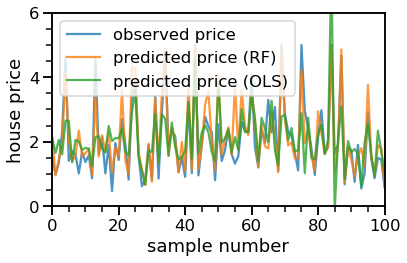

In [47]:
fig, ax = plt.subplots()
plt.plot(y_test.to_numpy(),alpha=0.8,label=r"observed price")
plt.plot(forest.predict(X_test),alpha=0.8,label=r"predicted price (RF)")
plt.plot(OLS_predictions.to_numpy(),alpha=0.8,label=r"predicted price (OLS)")
plt.xlabel(r"sample number")
plt.ylabel(r"house price")
plt.xlim(0,100)
plt.ylim(0,6)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
plt.legend(loc=2)
plt.tight_layout()
plt.show()

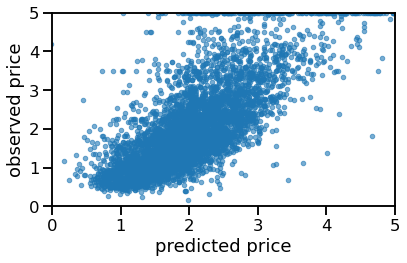

In [48]:
fig, ax = plt.subplots()
plt.plot(OLS_predictions.to_numpy(),y_test.to_numpy(),'.',alpha=0.6)
plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")
plt.xlim(0,5)
plt.ylim(0,5)
plt.tight_layout()
plt.show()